<a href="https://colab.research.google.com/github/Uday-Teja-nex/CodEvo-Solutions/blob/main/CodEvo_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df = df.drop('customerID', axis=1)

In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [ ]:
df.dropna(inplace=True)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(df.drop('Churn', axis=1), df['Churn'], test_size=0.2)

In [ ]:

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore')

# Columns to one-hot encode
cols_to_encode = [0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

# Fit the encoder on the training data
enc.fit(x_train.iloc[:, cols_to_encode])

# Transform the training and testing data
x_train_encoded = enc.transform(x_train.iloc[:, cols_to_encode]).toarray()
x_test_encoded = enc.transform(x_test.iloc[:, cols_to_encode]).toarray()


# Create new dataframes with encoded columns
x_train_encoded_df = pd.DataFrame(x_train_encoded, columns=enc.get_feature_names_out(x_train.columns[cols_to_encode]))
x_test_encoded_df = pd.DataFrame(x_test_encoded, columns=enc.get_feature_names_out(x_train.columns[cols_to_encode]))

# Concatenate the encoded columns with the remaining columns
x_train_final = pd.concat([x_train.drop(x_train.columns[cols_to_encode], axis=1).reset_index(drop=True), x_train_encoded_df.reset_index(drop=True)], axis=1)
x_test_final = pd.concat([x_test.drop(x_test.columns[cols_to_encode], axis=1).reset_index(drop=True), x_test_encoded_df.reset_index(drop=True)], axis=1)

In [ ]:
x_train_final.isnull().sum().sum()

0

In [ ]:
x_train_final.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,26,35.75,1022.50,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,9,75.75,655.90,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0,54,105.20,5637.85,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,60,105.90,6401.25,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,49,87.20,4345.00,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_final = scaler.fit_transform(x_train_final)
x_test_final = scaler.transform(x_test_final)

DUMMY MODEL

In [ ]:

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming y_test is defined from the previous code
y_pred_dummy = np.full(len(y_test), 'No')  # Predict 'Yes' for all instances
dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
print(f"Dummy model accuracy (always predicting 'Yes'): {dummy_accuracy}")

Dummy model accuracy (always predicting 'Yes'): 0.7192608386638237


Logistic Regression Model

In [ ]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create a logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Create a GridSearchCV object
grid_search_linear = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search_linear.fit(x_train_final, y_train)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", grid_search_linear.best_params_)
print("Best score:", grid_search_linear.best_score_)

# Make predictions on the test set using the best model
y_pred_linear = grid_search_linear.predict(x_test_final)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_linear)
print(f"Test accuracy: {accuracy}")

Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.8090666666666667
Test accuracy: 0.7924662402274343


Confusion Matrix

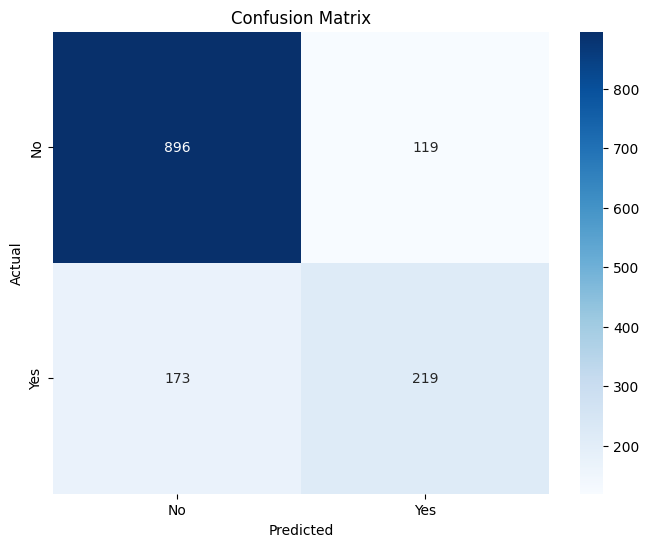

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined from the previous code
cm = confusion_matrix(y_test, y_pred_linear)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

from sklearn.metrics import precision_score, recall_score

# Assuming y_test and y_pred are defined from the previous code
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.6270270270270271
Recall: 0.5918367346938775


Decision Tree Model

Feature Importance

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: 0.789511111111111
Test accuracy: 0.7775408670931059


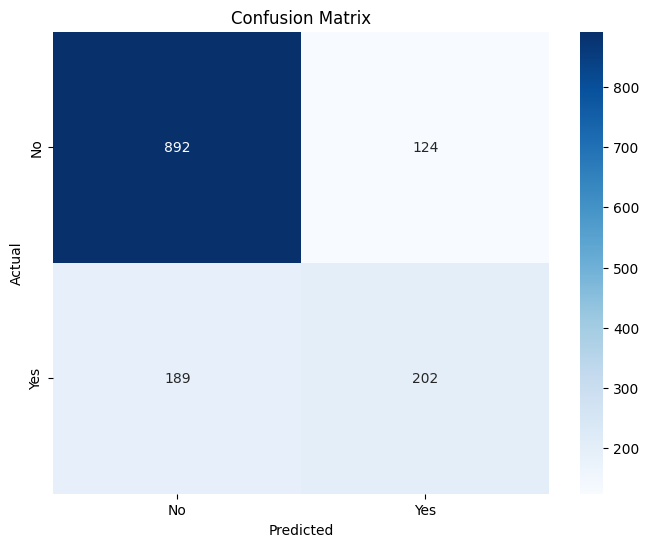

Precision: 0.6196319018404908
Recall: 0.5166240409207161


In [ ]:

# Decision Tree Classifier with GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,7,10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [4,6]
}

tree = DecisionTreeClassifier()
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_final, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

y_pred = grid_search.predict(x_test_final)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')

print(f"Precision: {precision}")
print(f"Recall: {recall}")

In [ ]:
# Assuming 'grid_search' is your fitted DecisionTreeClassifier with GridSearchCV
importances = grid_search.best_estimator_.feature_importances_
x_train_final = pd.DataFrame(x_train_final)
feature_names = x_train_final.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display or print the top N important features
print(feature_importance_df.head(10)) # Shows top 10

    Feature  Importance
36       36    0.503225
1         1    0.179762
16       16    0.147277
2         2    0.048485
3         3    0.031410
40       40    0.019318
29       29    0.013912
37       37    0.011854
13       13    0.011331
10       10    0.008768


'''
Based on commonly observed patterns in the Telco Customer Churn dataset, the following features often have significant impacts on churn:

Contract Type: Customers with month-to-month contracts tend to churn more frequently compared to those with longer-term contracts.
Tenure: Customers who have been with the company for a shorter duration are more likely to churn.
Internet Service: Fiber optic internet service is associated with higher churn rates compared to DSL.
Monthly Charges: Customers with higher monthly charges are more prone to churn.
Total Charges: While it may seem counterintuitive, sometimes lower total charges can indicate newer customers who are still in their trial period and more likely to churn.
Payment Method: Electronic check payment methods are often linked to increased churn compared to other methods.
Online Security and Tech Support: Lack of online security or tech support services can contribute to churn.
'''